In [ ]:
! pip install pillow
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2.1 Exercise - 1:**

Complete all the Task.

1. Read and display the image.

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image.

(-0.5, 365.5, 356.5, -0.5)

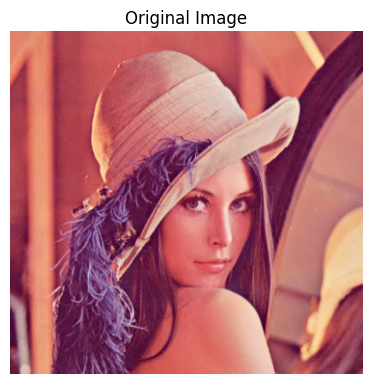

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = "/content/drive/MyDrive/AI&ML-Level6/Workshop1/unnamed1.png"
image = Image.open(image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")


2. Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and Array Indexing.

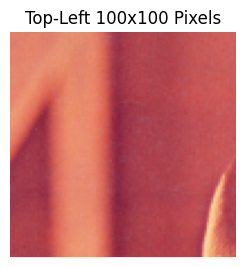

In [13]:
import numpy as np

image_array = np.array(image)
top_left = image_array[:100, :100]  # top-left 100x100 pixels

plt.subplot(1, 2, 2)
plt.imshow(top_left)
plt.title("Top-Left 100x100 Pixels")
plt.axis("off")
plt.show()

3. Show the three color channels (R, G, B).**

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

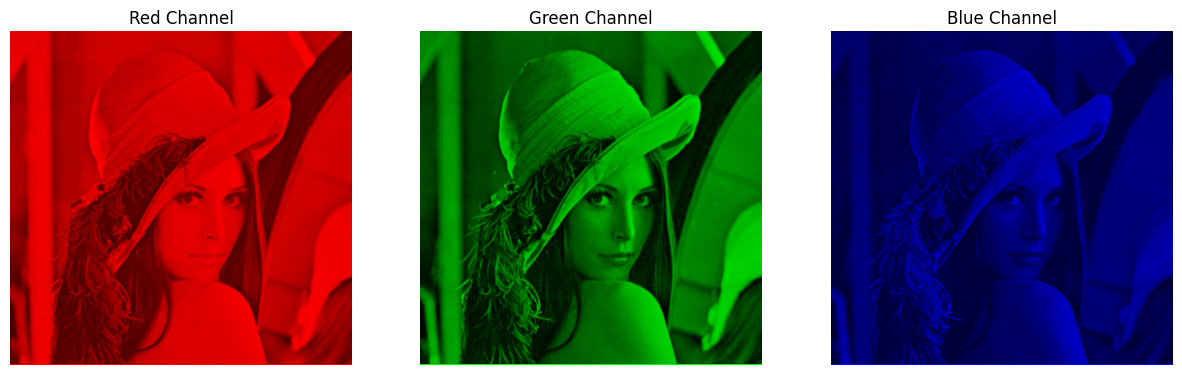

In [ ]:
# 3. Show the three color channels (R, G, B)
r_channel = image_array.copy()
g_channel = image_array.copy()
b_channel = image_array.copy()

# Keep only one channel, setting others to 0
r_channel[:, :, 1:] = 0  # Keep Red, remove Green & Blue
g_channel[:, :, [0, 2]] = 0  # Keep Green, remove Red & Blue
b_channel[:, :, :2] = 0  # Keep Blue, remove Red & Green

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(r_channel)
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(g_channel)
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(b_channel)
plt.title("Blue Channel")
plt.axis("off")
plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

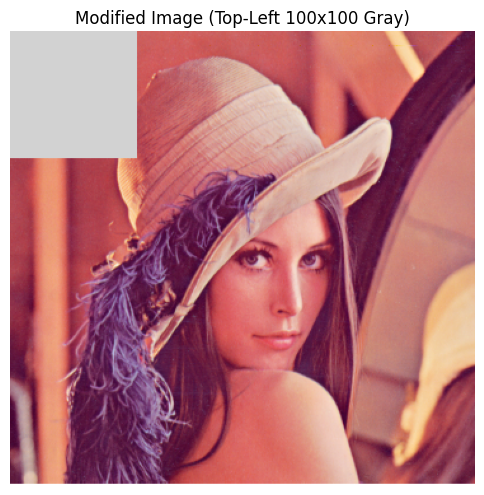

In [14]:
modified_image = image_array.copy()
modified_image[:100, :100] = [210, 210, 210]  # light gray (R=210, G=210, B=210)

plt.figure(figsize=(6, 6))
plt.imshow(modified_image)
plt.title("Modified Image (Top-Left 100x100 Gray)")
plt.axis("off")
plt.show()

**2.2 Exercise - 2:**

Complete all the Task.
1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


(-0.5, 219.5, 324.5, -0.5)

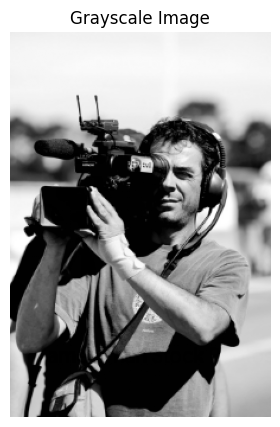

In [17]:
image_path = "/content/drive/MyDrive/AI&ML-Level6/Workshop1/unnamed.png"
gray_image = Image.open(image_path).convert("L")  # Convert to grayscale

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap="gray")  # Display grayscale image
plt.title("Grayscale Image")
plt.axis("off")

2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

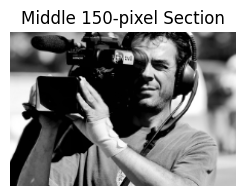

In [19]:
gray_array = np.array(gray_image)
height, width = gray_array.shape

start_y = height // 2 - 75  #start position
end_y = start_y + 150
cropped_image = gray_array[start_y:end_y, :]  #middle 150-pixel sected
plt.subplot(1, 2, 2)
plt.imshow(cropped_image, cmap="gray")
plt.title("Middle 150-pixel Section")
plt.axis("off")
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.

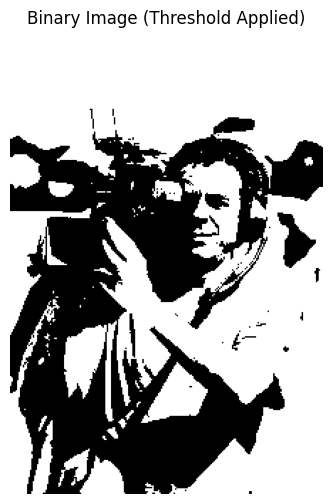

In [20]:
binary_image = np.where(gray_array < 100, 0, 255).astype(np.uint8)  # pixels <100 to 0, others to 255

plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image (Threshold Applied)")
plt.axis("off")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.

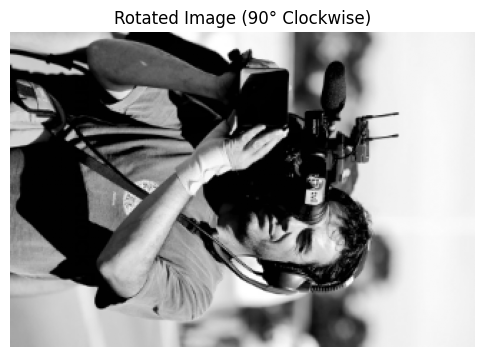

In [21]:
rotated_image = np.rot90(gray_array, k=3)

plt.figure(figsize=(6, 6))
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

5. Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.

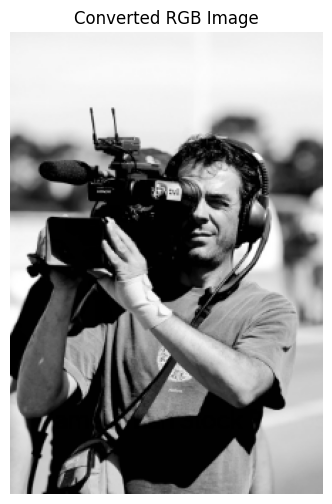

In [22]:
rgb_image = np.stack([gray_array] * 3, axis=-1)  # Replicate grayscale values across R, G, B channels

plt.figure(figsize=(6, 6))
plt.imshow(rgb_image)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()

**3 Image Compression and Decompression using PCA.**
1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.

In [24]:
image_path = "/content/drive/MyDrive/AI&ML-Level6/Workshop1/unnamed.png"
image = Image.open(image_path).convert("L")
image_array = np.array(image, dtype=np.float32)

mean_image = np.mean(image_array, axis=0)
centered_data = image_array - mean_image

2. Eigen Decomposition and Identifying Principal Components:

• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

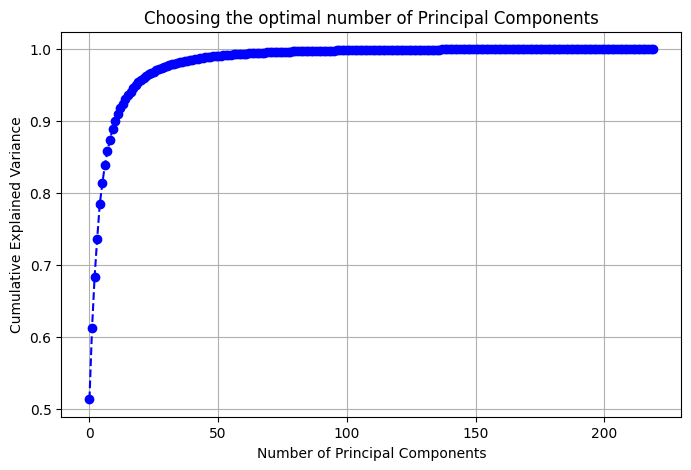

In [25]:

#Calc Cov Matrix
cov_matrix = np.cov(centered_data, rowvar=False)

#Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

#Sorting Eigenvalues & Eigenvectors in Desc Order
sorted_indices = np.argsort(eigenvalues)[::-1]  #Desc order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#Sum
explained_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.figure(figsize=(8, 5))
plt.plot(explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the optimal number of Principal Components")
plt.grid()
plt.show()


3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

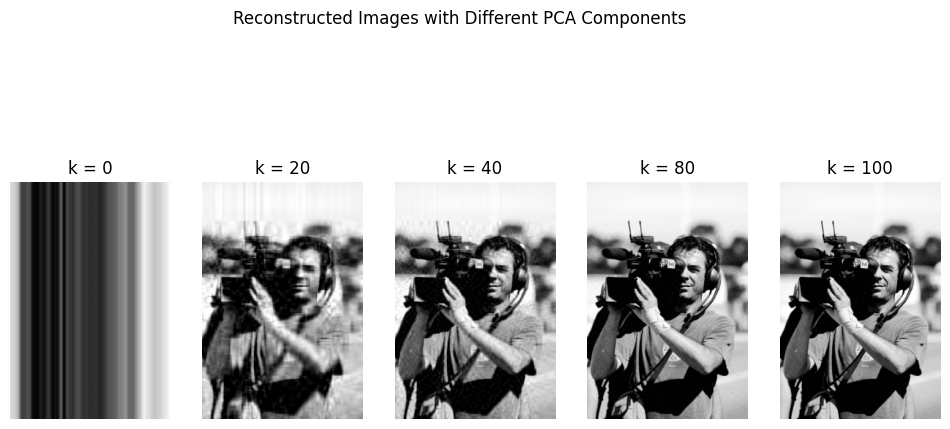

In [29]:
def reconstruct_image(k):
    top_k_eigenvectors = eigenvectors[:, :k]
    transformed_data = np.dot(centered_data, top_k_eigenvectors)
    reconstructed_data = np.dot(transformed_data, top_k_eigenvectors.T) + mean_image
    return np.clip(reconstructed_data, 0, 255)


k_values = [0, 20, 40, 80, 100]

plt.figure(figsize=(12, 6))
for i, k in enumerate(k_values):
    reconstructed_image = reconstruct_image(k)

    plt.subplot(1, 5, i+1)
    plt.imshow(reconstructed_image, cmap="gray")
    plt.title(f"k = {k}")
    plt.axis("off")

plt.suptitle("Reconstructed Images with Different PCA Components")
plt.show()
